# Event Related Responses
In this Jupyter notebook, I'll provide a quick introduction to **evoke responses**, aiming to help you develop a basic understanding of this concept. By the end of this tutorial, you'll have gained an intuition into evoke responses and their underlying principles.

## Simulating data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import mne
%matplotlib inline

In [2]:
sampfreq = 1000
prestim = .1
times = np.arange(400, dtype=np.float64) / sampfreq - prestim

def data_fun(times, ntrials = 100, noiselevel = 1, jitterlevel = .5): #Ntrials + some noise
    """Generate random source time courses. Sine multiplied by exponent.
        ntrials = number of trials
        noiselevel: multiples of std of signal
        jitterlevel: shift of sine in radians (full cycle 2pi)""" #APADT TO GENERATE A MATRIX
    
    rawtrials = np.zeros((ntrials, len(times)))
    
    for i in range(ntrials):
        #sourcewave = np.sin(50.0 * times) * np.exp(-((times - np.random.normal(.1, jitterlevel)) ** 2) / 0.01)
        sourcewave = np.sin(50.0 * times - np.random.normal(0, jitterlevel)) * np.exp(-((times - .1) ** 2) / 0.01)
        noisewave = np.random.normal(0, np.std(sourcewave) * noiselevel, len(sourcewave))
        rawtrials[i,] = sourcewave + noisewave

    return rawtrials


In [3]:
test = data_fun(times, ntrials = 20, noiselevel = 2, jitterlevel= .5)

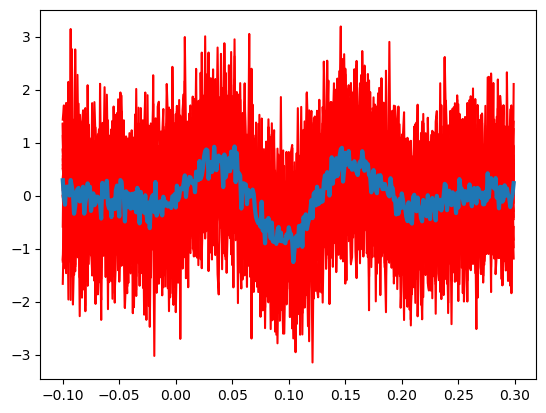

In [4]:
#plot overlay of single trials
plt.plot(times.T, test.T, color = 'red')

#plot overlay of average
plt.plot(times.T, np.mean(test.T, axis=1), linewidth = 3)
plt.show()

**Discuss: What do you notice?**

## Real Data

This is data from an MEG experiment presenting tones in a regular manner (3 Hz) and occasionally (10%) omitting some. The paradigm is very similar to [Demarchi et al.](https://www.nature.com/articles/s41467-019-11440-1). The data was provided by Anne Hauswald, and preprocessed in [Fieldtrip](https://www.fieldtriptoolbox.org). We will import this data and analyse it in [MNE](https://mne.tools/stable/index.html). 

In [5]:
#First we need some basics info about recording, which we “steal“ from a different data set.

info = mne.io.read_info("sample-info.fif", verbose = True)
info = mne.Info(info, sfreq=100)

In [6]:
print(info)

<Info | 23 non-empty values
 acq_pars: ACQactiveGround 0 ACQch.BIO001.gain 2000 ACQch.BIO001.highpass ...
 bads: []
 ch_names: EOG001, EOG002, ECG003, IASX+, IASX-, IASY+, IASY-, IASZ+, ...
 chs: 2 EOG, 1 ECG, 11 IAS, 102 Magnetometers, 204 Gradiometers, 2 misc, 18 Stimulus, 1 SYST
 custom_ref_applied: False
 description: TRIUX system at Salzburg-3122
 dev_head_t: MEG device -> head transform
 dig: 313 items (3 Cardinal, 5 HPI, 305 Extra)
 experimenter: meg (meg)
 file_id: 4 items (dict)
 gantry_angle: 60.0
 highpass: 0.1 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 hpi_subsystem: 2 items (dict)
 line_freq: 50.0
 lowpass: 330.0 Hz
 meas_date: 2022-05-18 07:29:56 UTC
 meas_id: 4 items (dict)
 nchan: 341
 proc_history: 1 item (list)
 proj_id: 1 item (ndarray)
 proj_name: fs_sbg_hearing
 projs: []
 sfreq: 100.0 Hz
 subject_info: 6 items (dict)
>


In [10]:
# path to the data provided by Anne Hauswald
datapath = "/Users/b1019548/Library/CloudStorage/OneDrive-UniversitätSalzburg/Teaching/Master_VO_MethodsCogNeuro/Lectures/Lecture1_ERP/data/data_sub3_preproc_gp_old.mat"

epochs = mne.read_epochs_fieldtrip(datapath, info)

Adding metadata with 2 columns
16000 matching events found
No baseline correction applied


In [11]:
# lets look what is inside
print(epochs) #general description of structure
dir(epochs) #what can we do with it?

#16, 32, 64 und 128 sind die 4 töne und die träger +1 sind dann die „dazugehörigen“ omissions (17 ist omission von 16)

<EpochsArray |  16000 events (all good), -0.38 - 0.41 sec, baseline off, ~1002.3 MB, data loaded, with metadata,
 '16': 3606
 '17': 400
 '32': 3583
 '33': 400
 '64': 3612
 '65': 400
 '128': 3599
 '129': 400>


['__class__',
 '__contains__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__next__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_annotations',
 '_bad_dropped',
 '_channel_type_idx',
 '_check_consistency',
 '_check_metadata',
 '_compute_aggregate',
 '_current',
 '_data',
 '_decim',
 '_decim_slice',
 '_detrend_offset_decim',
 '_detrend_picks',
 '_do_baseline',
 '_do_delayed_proj',
 '_evoked_from_epoch_data',
 '_filename',
 '_get_channel_positions',
 '_get_data',
 '_get_epoch_from_raw',
 '_getitem',
 '_handle_tmin_tmax',
 '_is_good_epoch',
 '_item_to_select',
 '_keys_to_idx',
 '_metadata',
 '_name',
 '_offset',
 '_pick_drop_channels',
 '_pick_projs',
 '_project_e

In [12]:
evoked = epochs.average()



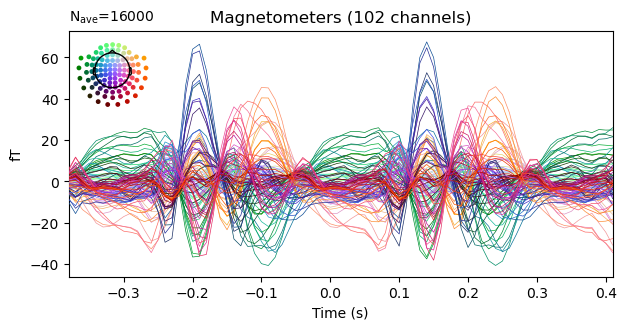

In [13]:
#plot time series
evoked.plot();

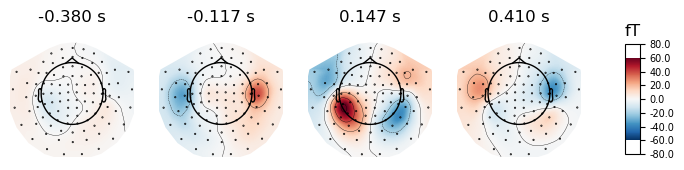

In [14]:
#plot topographies
evoked.plot_topomap();
#evoked.plot_joint();


## Single trials vs average

In [25]:
#get data as numpy array
evkdata=evoked.get_data();
rawdata = epochs.get_data();
print(rawdata.shape)
print(evkdata.shape)

(16000, 102, 80)
(102, 80)


In [ ]:
#get channel with maximum response
chanindmax = np.argmax(np.mean(np.abs(evkdata), axis =1))
plt.plot(evoked.times, evkdata[chanindmax,])
plt.show()


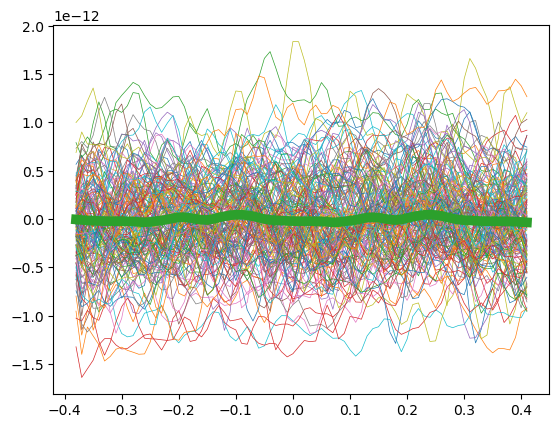

In [28]:
#redraw with single trial
plt.plot(evoked.times.T, rawdata[range(1,16000,100),chanindmax,:].T, linewidth = .5)
plt.plot(evoked.times.T, evkdata[chanindmax,].T, linewidth = 7)
plt.show()


What do you notice?